In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
np.set_printoptions(legacy='1.25')

In [2]:
ms = np.array([200, 300, 400, 500, 600, 700, 800, 900,]) # units: g
ls = np.array([5.1, 5.5, 5.9, 6.8, 7.4, 7.5, 8.6, 9.4,]) # units: cm
sigma_ys = 0.2

xs = ms
ys = ls

xdy = sum(xs * ys)
sx = sum(xs)
sy = sum(ys)
sx2 = sum(xs**2)
n = len(xs)
assert (len(xs) == len(ys))

slope = (n * xdy - sx * sy) / (n * sx2 - sx**2)
intercept = (sx2 * sy - sx * xdy) / (n * sx2 - sx**2)
sigma_slope = sigma_ys / np.sqrt(n * ((sx2 / n)**2 - (sx / n)**2))
sigma_intercept = sigma_ys * np.sqrt(sx2 / n / n / ((sx2 / n)**2 - (sx / n)**2))
print(f"{slope=} +/- {sigma_slope=}")
print(f"{intercept=} +/- {sigma_intercept=}")
k = 9.8 / (slope * 0.01 * 1000)  # convert to N/m
sigma_k = k * sigma_slope / slope
print(f"{k=} +/- {sigma_k=}  N/m")

chi_2 = 1.0 / sigma_ys**2 * sum( (ls - (slope * ms + intercept))**2)
nu = n - 2
p = 1 - ss.chi2.cdf(chi_2, df=nu)
print(f"{chi_2=}")
print(f"{p=}")
# note that if you can only use the Schaum's chi2, table, then you can figure out that p has to be betwween 0.25 and 0.1

slope=0.006071428571428571 +/- sigma_slope=1.9918524783899425e-07
intercept=3.6857142857142855 +/- sigma_intercept=0.00011867830825227481
k=161.41176470588238 +/- sigma_k=0.0052954328588116295  N/m
chi_2=8.82142857142855
p=0.18387266625042342


(3.0, 10.0)

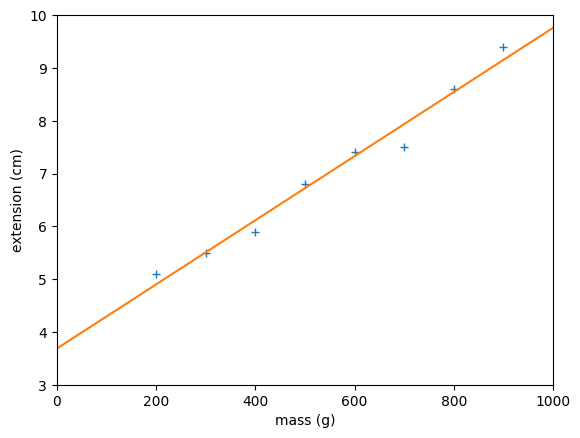

In [3]:
plt.plot(ms, ls, "+")
lms = np.linspace(0, 1000, 10)
plt.plot(lms, lms * slope + intercept)
ax = plt.gca()
ax.set_xlabel("mass (g)")
ax.set_ylabel("extension (cm)")
ax.set_xlim([0, 1000])
ax.set_ylim([3, 10])